# Monte Carlo: Estimating $\pi$

Get wiki definition of MC...

In a lot of problems that appear in quant finance, you will be using the statistics of probability distributions. Often times, these distributions are too complex to solve analytically suffering from problems such as [*the curse of dimensionality*](#). Monte Carlo offers a solution by picking samples from these distributions instead of considering the entire distribution at once. With enough of these samples, your calculations should converge on the analytic solution. We are happy to give some precision (or accuracy idk?) for huge gains in computational complexity. It gets it name from the randomness appearing in the casinos of Monte Carlo (is this true?).

Our first example is the *Hello World* of Monte Carlo where we will estimate $\pi$ by picking numbers from a 2D uniform distribution. Here we have the analytic solution so it serves as an intutivie example as we see our estimate converge towards $\pi$

The animation above shows the main idea of the following task. We pick points uniformally from in a 1x1 grid and then see whether these points would lie in a semi-circle. From this we can estimate $\pi$ 



In [158]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
def estimate_pi_naive(n_samples: int) -> float:

    n_circ = 0

    for _ in range(n_samples):
        # generate coords
        x = random.random()
        y = random.random()

        if x**2 + y**2 < 1:
            n_circ += 1

    return 4 * n_circ / n_samples

estimate_pi_naive(n_samples=10000)

3.1436

In [18]:
def estimate_pi_vectorised(n_samples: int) -> np.array(float):

    x = np.random.uniform(0,1,n_samples)
    y = np.random.uniform(0,1,n_samples)

    hit_list = np.where(x**2 + y**2 < 1, 1, 0)
    cum_samples = np.arange(1, n_samples + 1)
    cum_estimate = 4 * np.cumsum(hit_list) / cum_samples

    return cum_estimate



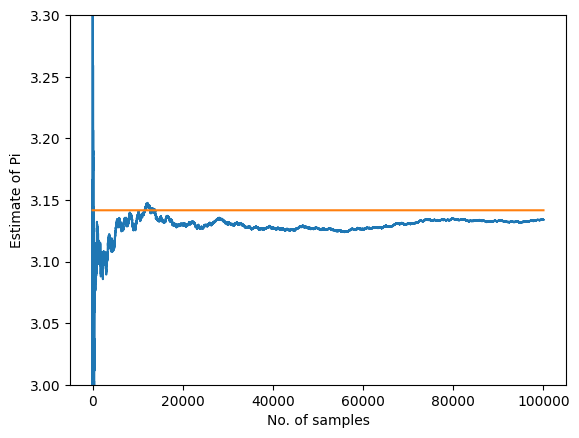

In [19]:
n_samples = 100000
cum_estimate = estimate_pi_vectorised(n_samples=n_samples)
cum_samples = np.arange(1, n_samples + 1)

plt.plot(cum_samples, cum_estimate)
plt.plot(cum_samples, np.repeat(np.pi, n_samples))
plt.ylim(3,3.3)
plt.xlabel("No. of samples")
plt.ylabel("Estimate of Pi")
plt.show()


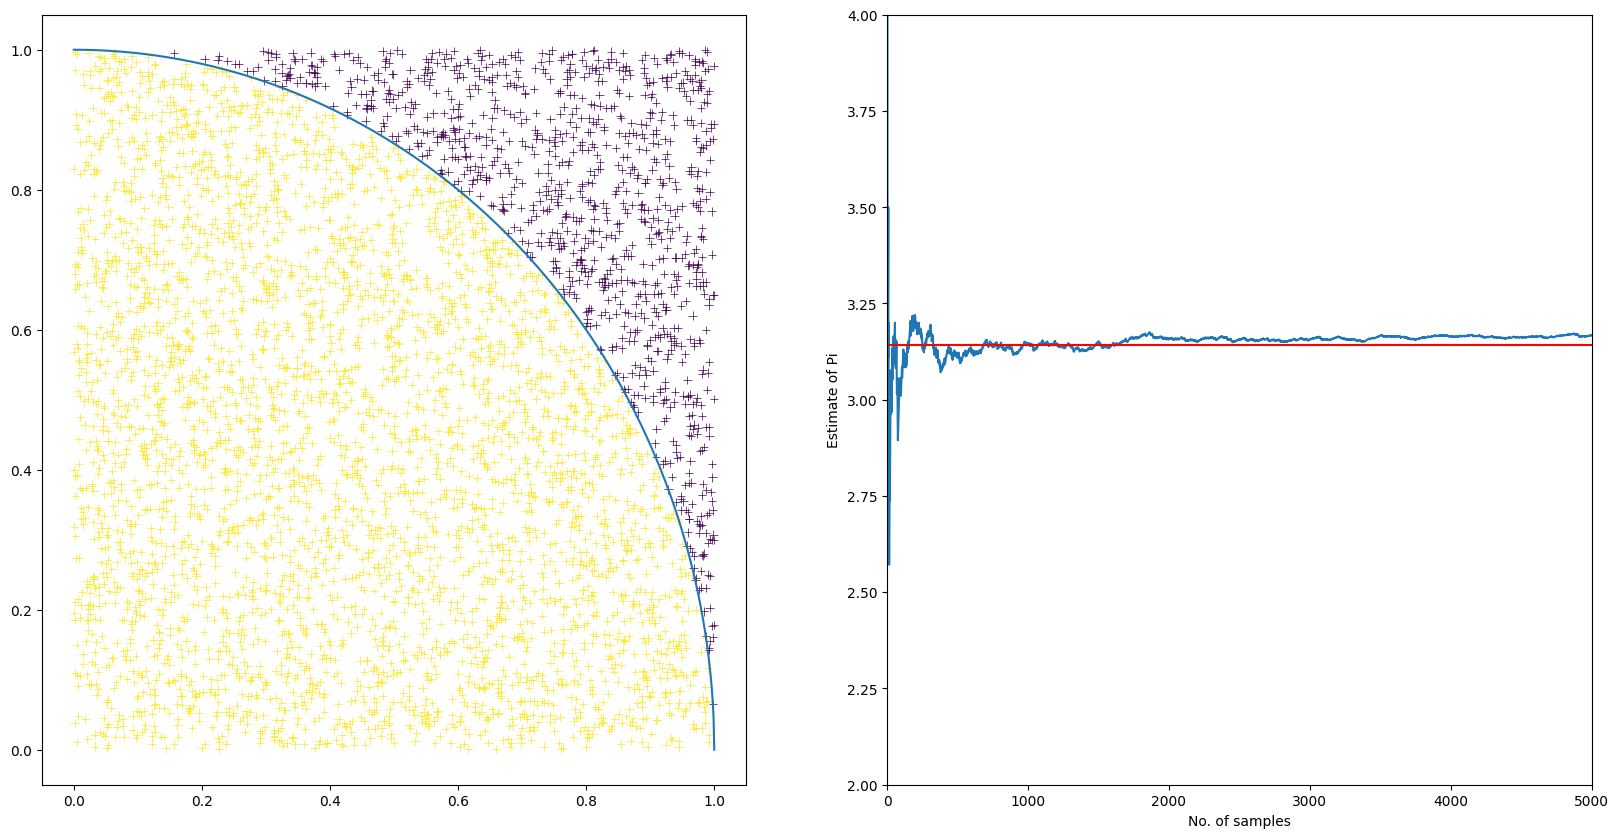

In [146]:
# create circle 
x_circ = np.linspace(0,1,1000)
y_circ = np.sqrt(1 - x_circ**2)

# create random points
n_samples = 5000
x = np.random.uniform(0,1,n_samples)
y = np.random.uniform(0,1,n_samples)
hit_list = np.where(x**2 + y**2 < 1, 1, 0)

# for i in range(n_samples):
# do the animation by slicing the hitlist etc.
# should we do a circle or quarter circle
    
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(20) # probably a nicer way to do this 
fig.set_figheight(10) # probably a nicer way to do this
# fig.set_title('Estimating pi using Monte Carlo')

# plt.vline() figure out syntax 
ax1.plot(x_circ, y_circ)
ax1.scatter(x,y, c=hit_list, marker='+', linewidths=0.5)

# plot running total
cum_samples = np.arange(1, n_samples + 1)
cum_estimate = 4 * np.cumsum(hit_list) / cum_samples
ax2.plot(cum_samples, cum_estimate)
ax2.axhline(np.pi, c='r')
ax2.set_ylim(2,4)
ax2.set_xlim(0,n_samples)
ax2.set_xlabel("No. of samples")
ax2.set_ylabel("Estimate of Pi")
plt.show()

AttributeError: 'list' object has no attribute 'scatter'

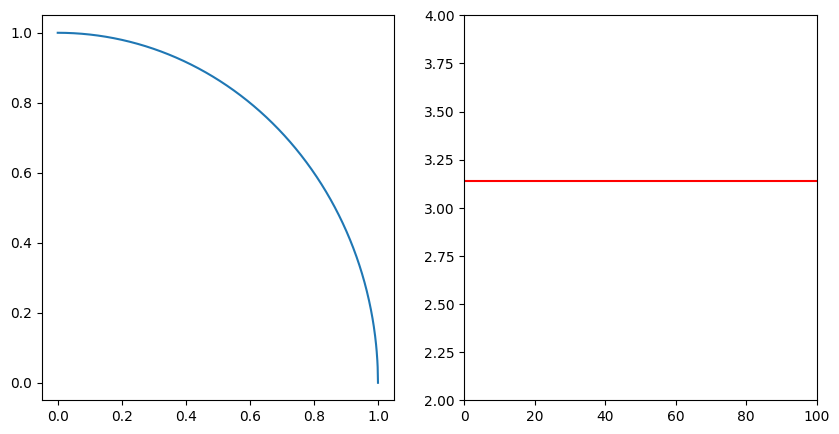

In [170]:
ims = []

n_samples = 100

x = np.random.uniform(0,1,n_samples)
y = np.random.uniform(0,1,n_samples)
hit_list = np.where(x**2 + y**2 < 1, 1, 0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10) # probably a nicer way to do this 
fig.set_figheight(5) # probably a nicer way to do this

# create circle 
x_circ = np.linspace(0,1,1000)
y_circ = np.sqrt(1 - x_circ**2)
ax1.plot(x_circ, y_circ)

ax2.axhline(np.pi, c='r')
ax2.set_ylim(2,4)
ax2.set_xlim(0,n_samples)

for i in range(n_samples):

    im = ax1.scatter(x[:i],y[:i], c=hit_list[:i], marker='+', linewidths=0.5)

    cum_samples = np.arange(1, i + 1)
    cum_estimate = 4 * np.cumsum(hit_list[:i]) / cum_samples[:i]
    ax2.plot(cum_samples, cum_estimate)
    
  #  im = fig
        
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

writergif = animation.PillowWriter(fps=30)
ani.save('filename.gif',writer=writergif)

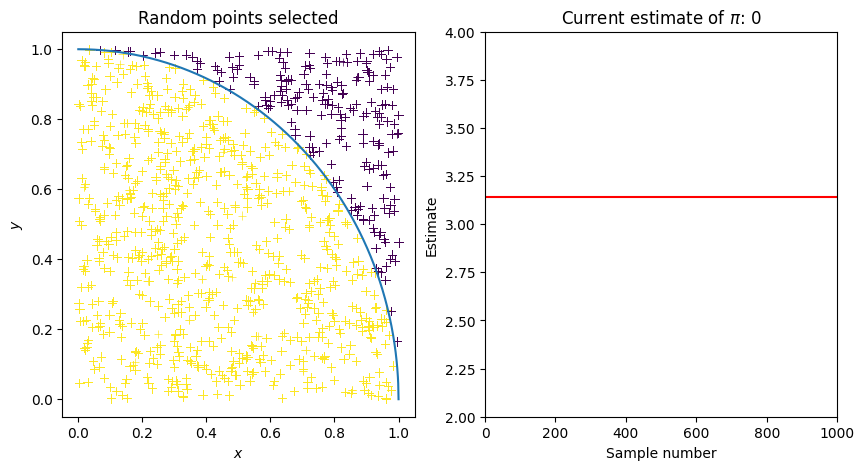

In [ ]:
ims = []

n_samples = 1000

x = np.random.uniform(0,1,n_samples)
y = np.random.uniform(0,1,n_samples)
hit_list = np.where(x**2 + y**2 < 1, 1, 0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10) # probably a nicer way to do this 
fig.set_figheight(5) # probably a nicer way to do this

# create circle 
x_circ = np.linspace(0,1,1000)
y_circ = np.sqrt(1 - x_circ**2)
ax1.plot(x_circ, y_circ)

points_per_frame = 10

def update(i):

    frame = i*points_per_frame
    # Update the scatter plot in ax1
    ax1.scatter(x[:frame], y[:frame], c=hit_list[:frame], marker='+', linewidths=0.5)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_title('Random points selected')
    

    # Calculate cumulative estimates for ax2
    cum_samples = np.arange(1, frame + 1)
    cum_estimate = 4 * np.cumsum(hit_list[:frame]) / cum_samples

    curr_estimate = cum_estimate[-1] if len(cum_estimate) != 0 else 0

    # Update the line plot in ax2
    ax2.clear()  # Clear the previous line plot
    ax2.axhline(np.pi, c='r')
    ax2.set_ylim(2,4)
    ax2.set_xlim(0,n_samples)
    ax2.set_title(fr'Current estimate of $\pi$: {curr_estimate}') # need to round this 
    ax2.set_xlabel('Sample number')
    ax2.set_ylabel('Estimate')
    ax2.plot(cum_samples, cum_estimate)


ani = animation.FuncAnimation(fig, update, frames=n_samples//points_per_frame, interval=100, repeat=False)

writergif = animation.PillowWriter(fps=30)
ani.save('filename.gif',writer=writergif)